In [ ]:
!pip install bertopic

In [ ]:
!pip install bertopic[visualization]
!pip install plotly==5.15.0

In [ ]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
!pip install octis

In [ ]:
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Mecab
from bertopic import BERTopic

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!wget -O ns_reviewss.csv https://www.dropbox.com/s/a2te6ou3mz21i78/ns_reviewss_positive_temp.csv?dl=0
!wget -O ns_reviewss2.csv https://www.dropbox.com/s/ea8kgugiffgw7yp/ns_reviewss2.csv?dl=0
!wget -O stopwords.txt https://www.dropbox.com/s/7nb3uhaj08aamiw/stopwords.txt?dl=0

In [ ]:
import pandas as pd

df = pd.read_csv('ns_reviewss.csv')
documents = []

stopwords = []

f = open('stopwords.txt', 'r', encoding='utf-8')
while True:
    line = f.readline()
    if not line: break
    stopwords.append(line.rstrip())

print(stopwords)

mecab = Mecab()
def get_content(x):
    word_tokens = mecab.pos(x)
    result = []
    for w, p in word_tokens:
        if len(w) <= 1 or w in stopwords:
            continue
        if p[:3] == 'NNG' or p[:3] == 'NNP' or p[:2] == 'VV' or p[:2] == 'VA':

            result.append(w)
    if len(result) > 1:
        documents.append(' '.join(result))
df_seje = df[df['product_category'] == '슬립온']
df_seje = df_seje[df_seje['star_rating'] == 5]
p_li = df_seje.groupby('productName').count().index.to_list()
print(p_li[0])
df_seje[df['productName'] == p_li[0]]['content'].apply(get_content)

['은', '는', '이', '가', '네요', '합니다', '아요', '아주', '어요', '으면', '아용', '는데', '해졌', '해서', '아오', '지나', '아요', '그런지', '중간', '어야', ';;', '감사', '아서', '아직', '다음', '매번', '백서', '모르', '구매', '엄마', '저요', '조아', '져요', '30', '벌써', '이거', '진작', '그랬', '샀으면', '!', '!!', '!!!', '!!!!', '!!!!!', '!!!!!!', '!!!!!!!', '이제야', '씁니다', '오우', '으면', '게여', '~', '^', '~^^', '요오', '지만', '납니다', '아니', '광고', '삼림', '인데', '아서', 'ㅎㅎ', 'ㅎ', 'ㅎㅎㅎ', 'ㅎㅎㅎㅎ', 'ㅎㅎㅎㅎㅎ', 'ㅎㅎㅎㅎㅎㅎ', '해서', '보다', '한데', 'ㅋ', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋㅋㅋ', '샤샤', '놔요', '께요', '예요', '여러', '~~~~~~~', '후기', '아서', '보고', '습니다', '입니다', '욕ㅋ', '쓸께요', '쓸게요', '할게요', '항상', '처음', '요조', '기그', '졋어요', '아우', '정하', '요요', '세여', '마니', '탁조', '<br>', '<em>', '조기', '미닉스']
르무통 메이트 발 편한 썸머울 쾌적한 데일리 운동화


195100    None
195101    None
195103    None
195104    None
195106    None
          ... 
208575    None
208576    None
208577    None
208578    None
208579    None
Name: content, Length: 11803, dtype: object

In [ ]:
print(documents[:5])
preprocessed_documents = []

for line in tqdm(documents):
  # 빈 문자열이거나 숫자로만 이루어진 줄은 제외
  if line and not line.replace(' ', '').isdecimal():
    preprocessed_documents.append(line)


['직업 출근 배송 나왔 가볍 완벽 정도 솜이불 온몸 싸매 침대 누운 느낌 알긴 녹아내리 바닥 요즘 놀이터 맨발 느낌 여름 이번 여름 지내 평소 나온 신발 사람 사이즈 걱정 발등 그런가 사이즈 크기 손가락 들어가 정도 정도 운동 부분 발목 불편 발꿈치 맞추 발가락 앞부분 정도 정도 신발 발등 전력 질주 이상 벗겨질 발가락 신기 편할 색상 진한 청색 코디 어울릴 만족 신발 디자인 빠른 배송 오늘 열일', '짝꿍 생일 선물 무통 일본 여행 짝꿍 오사카 무통 여성 짝꿍 체구 커요 최근 여행 아프 발볼 사람 신발 여행 다녔 디자인 스니커즈 디자인 어울려요 재질 무게 보통 스니커즈 천보다 두껍 느낌 그럼에도 신발 가벼워 발볼 짝꿍 기발 발볼 발등 편합니다 착화 짝꿍 편하 아껴', '추가 하루 신고 출퇴근 신고 다니 신발 헐떡이 느낌 신발 편하 느낌 이상 단위 만들 주문 교환 만족 평소 단위 주문 디자인 귀엽 무게 가볍 신발 넓혀서 느낌 느낌 바지 스키니 엄지발가락 신발 앞코 고민 가로수길 매장 신어 신발 넓히 박스 꺼낸 상태 신어 여유 자연 들어가 편하 교환 기간 교환 신청 만약 교환 교환 교환 교환 신청 답변 치수 답변 확신 오늘 교환 배송 도착 편하 들어가 신고 집안 다니 편해요 발볼 치수 편하 사이즈 양말 수준 내일 신고 다닐 다녔 가격 편하 신발', '택배 무통 첫인상 호감 플라스틱 종이 박스 포장 환경 신경 기업 생각 신발 생각 생겼 신발 들어가 입구 부분 갈색 못생겼 느꼈 왕발 보였 생각 바닥 발등 들어가 부분 느껴졌 착화 반품 생각 반품 후회 사진 일반 스니커즈 나오 신발 모양 맞춰 편해요 바닥 받쳐 느낌 발목 무리 기분 단점 신발 밑창 들어오 밑창 마르 만족 색상 의사 신발 신고 발목 통증 느낀', '크롭 앨범 올리 상품 이미지 올리 첨부 발길 발볼 족저 근막염 타입 평생 만족 신발 도전 발목 무너지 무릎 느낌 편하 스케쳐 신발 접하 인생 신발 디자인 무통 접했 패션 구하 생각 할인 이벤트 소식 기다렸 신발 평소 신발 스케쳐 발볼 편하 자체 생각 발등 조

100%|██████████| 10891/10891 [00:00<00:00, 1063764.26it/s]


In [ ]:
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer
ctfidf_model = ClassTfidfTransformer(bm25_weighting=True, reduce_frequent_words=True)


representation_model = KeyBERTInspired()

class CustomTokenizer:
    def __init__(self, tagger):
        self.tagger = tagger
    def __call__(self, sent):
        # sent = sent[:1000000]
        word_tokens = sent.split(' ')
        result = []
        for w in word_tokens:
            if len(w) >= 1 and not w in stopwords:
                result.append(w)

        return result

custom_tokenizer = CustomTokenizer(Mecab())
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, max_features=3000)

seed_li = [['디자인', '색상', '색깔', '색', '모양'],
           ['깨끗', '청소', '세정', '세척', '깔끔'],
           ['선물', '부모님', '부모', '엄마', '아빠',],
           ['무게', '가볍', '들다', '편하다'],
           ['배송', '빠른', '빠르', '빨라요', '빠릅니다']]

n_topic = 3
model = BERTopic(embedding_model="beomi/KcELECTRA-base-v2022",
                 representation_model=representation_model,
                 ctfidf_model=ctfidf_model,
                 seed_topic_list=seed_li,
                 vectorizer_model=vectorizer,
                 nr_topics=n_topic,
                 top_n_words=10,
                 calculate_probabilities=True)

In [ ]:
topics, probs = model.fit_transform(preprocessed_documents)

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/beomi_KcELECTRA-base-v2022 were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
res = 0
for k in range(n_topic-1):
    words = [w for w, p in model.get_topic(k)]

    for i in range(9):
        for j in range(i+1, 10):
            res += cos_sim(ft.get_word_vector(words[i]), ft.get_word_vector(words[j]))

In [ ]:
print(res/2)

7.921251282095909


In [ ]:
from octis.evaluation_metrics.coherence_metrics import Coherence
npmi = Coherence(texts=[w.split() for w in preprocessed_documents])

In [ ]:
model.visualize_topics()

ValueError: ignored

In [ ]:
print(model.topic_sizes_)

Counter({-1: 6188, 0: 4631, 1: 72})


In [ ]:
topic_idxs = []
while model.topic_sizes_[0] / model.topic_sizes_[1] >= 10:
    n_topic += 1
    print('topic number increased')
    model = BERTopic(embedding_model="beomi/KcELECTRA-base-v2022",
                 vectorizer_model=vectorizer,
                 nr_topics=n_topic,
                 top_n_words=10,
                 calculate_probabilities=True)

    topics, probs = model.fit_transform(preprocessed_documents)
    print(model.topic_sizes_)

st = 0
for i in range(n_topic-1):
    keyword = []
    for w, p in model.get_topic(i):
        keyword.append(w)
    if not '배송' in keyword:
        if len(topic_idxs) == 0:
            st = i
            print(st)
            topic_idxs.append(i)
        elif model.topic_sizes_[st] / model.topic_sizes_[i] <= 5:
            topic_idxs.append(i)
        else:
            break


In [ ]:
for i in range(0, n_topic-1):
  print(i,'번째 토픽 :', model.get_topic(i))
for i in range(0, n_topic-1):
  print('topic {}:'.format(i+1), end=' ')
  for w, p in model.get_topic(i):
    print(w, end=' ')
  print('')

0 번째 토픽 : [('발볼', 0.59288704), ('신어', 0.5581603), ('가벼워서', 0.5531374), ('반신반의', 0.5510247), ('발편', 0.55066293), ('편해요', 0.543149), ('편합니다', 0.5410656), ('지외', 0.5276013), ('족저', 0.5175528), ('걸어도', 0.51423866)]
1 번째 토픽 : [('색상', 0.6566635), ('가족', 0.63845116), ('어머니', 0.6074452), ('운동화', 0.59730685), ('만족', 0.5968543), ('아이', 0.579113), ('빠른', 0.55603254), ('사진', 0.54752403), ('쿠션', 0.5467197), ('착용', 0.53395337)]
topic 1: 발볼 신어 가벼워서 반신반의 발편 편해요 편합니다 지외 족저 걸어도 
topic 2: 색상 가족 어머니 운동화 만족 아이 빠른 사진 쿠션 착용 


In [ ]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6139,-1_편했_발볼_가벼워서_신어,"[편했, 발볼, 가벼워서, 신어, 편해요, 편합니다, 푹신, 걸어도, 발편, 지외]",[아파 지인 추천 무통 신고 보이 편하 아프 발볼 디자인 예쁘 발볼 편안 신발 무통...
1,0,4683,0_발볼_신어_가벼워서_반신반의,"[발볼, 신어, 가벼워서, 반신반의, 발편, 편해요, 편합니다, 지외, 족저, 걸어도]",[평소 느낌 신발 편하 편하 가벼워 신고 편하 발볼 발등 신발 신고 불편 무통 편하...
2,1,69,1_색상_가족_어머니_운동화,"[색상, 가족, 어머니, 운동화, 만족, 아이, 빠른, 사진, 쿠션, 착용]","[빠른 배송, 빠른 배송, 빠른 배송]"


In [ ]:
!pip install openai

In [ ]:
# -*coding: utf-8 -*
import os
import openai

openai.api_key = ''
prompt = '''

1. 위에 있는 단어들은 '{}' 상품의 리뷰에서 추출한 키워드들이다.
2. 저 키워드들을 활용해서 이 상품의 장점을 한 문장으로 설명한다.
3. 모든 키워드를 쓸 필요 없이, 자연스러운 간결한 문장 하나로 완성한다.
4. 한글로 쓴다.
5. 객관적인 시선으로 쓴다.
'''.format('세제')

keyword = []
for i in topic_idxs:
    for w, p in model.get_topic(i):
        keyword.append(w)

completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": ' '.join(keyword)+prompt}
    ]
)
print(' '.join(keyword)+prompt)
print(completion.choices[0].message['content'])

제거 곰팡이 박멸 살균 우수 품질 완전 청소   청소 화장실 욕실 상품 번창 사업 순삭 락스 냄새 이용 효과 기대 만족 최고 적극 추천 완전 대박 사용 구수

1. 위에 있는 단어들은 '세제' 상품의 리뷰에서 추출한 키워드들이다.
2. 저 키워드들을 활용해서 이 상품의 장점을 한 문장으로 설명한다.
3. 모든 키워드를 쓸 필요 없이, 자연스러운 간결한 문장 하나로 완성한다.
4. 한글로 쓴다.
5. 객관적인 시선으로 쓴다.

이 상품은 곰팡이를 제거하고 박멸하여 욕실과 화장실을 완전히 청소할 수 있는 우수한 품질을 가지고 있습니다.


In [ ]:
!git clone https://github.com/facebookresearch/fastText.git


Cloning into 'fastText'...
remote: Enumerating objects: 3946, done.
remote: Counting objects: 100% (974/974), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 3946 (delta 872), reused 831 (delta 820), pack-reused 2972
Receiving objects: 100% (3946/3946), 8.25 MiB | 12.04 MiB/s, done.
Resolving deltas: 100% (2510/2510), done.


In [ ]:
!sudo sudo pip install fastText/

Processing ./fastText
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4384288 sha256=c34d71a12ba20285f6ed2376122cdded04f964b73dafaaca06346213f5f643f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-x0dobfu9/wheels/8b/05/af/3cfae069d904597d44b309c956601b611bdf8967bcbe968903
Successfully built fasttext


In [ ]:
import fasttext.util

fasttext.util.download_model('ko', if_exists='ignore')
ft = fasttext.load_model('cc.ko.300.bin')

In [ ]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    if norm(a) == 0 or norm(b) == 0:
        return 0
    return dot(a, b)/(norm(a)*norm(b))

# res = 0
# for k in range(n_topic-1):
#     words = [w for w, p in model.get_topic(k)]

#     for i in range(9):
#         for j in range(i+1, 10):
#             res += cos_sim(ft.get_word_vector(words[i]), ft.get_word_vector(words[j]))
# print(res/(n_topic-1))


In [ ]:
max_ntopic = 3
max_sim = 0
for nt in range(3, 11):
    model = BERTopic(embedding_model="beomi/KcELECTRA-base-v2022",
                 representation_model=representation_model,
                 ctfidf_model=ctfidf_model,
                 seed_topic_list=seed_li,
                 vectorizer_model=vectorizer,
                 nr_topics=nt,
                 top_n_words=10,
                 calculate_probabilities=True)

    topics, probs = model.fit_transform(preprocessed_documents)
    res = 0
    for k in range(nt-1):
        try:
            words = [w for w, p in model.get_topic(k)]

            for i in range(9):
                for j in range(i+1, 10):
                    res += cos_sim(ft.get_word_vector(words[i]), ft.get_word_vector(words[j]))
        except:
            print('some topics are not generated!')
        print(nt, res/(nt-1))
        if max_sim < res/(nt-1):
            max_sim = res/(nt-1)
            max_ntopic = nt




Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/beomi_KcELECTRA-base-v2022 were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


3 4.241765892133117
3 8.154661545529962


Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/beomi_KcELECTRA-base-v2022 were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


4 2.3152180574834347
4 4.855229480812947
4 5.346854546417792


Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/beomi_KcELECTRA-base-v2022 were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


5 2.591566505841911
5 4.736353600630537
5 6.817301756935194
5 7.186020556138828


Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/beomi_KcELECTRA-base-v2022 were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


6 1.9635285008698702
6 3.523007851652801
6 5.187766376696527
6 5.482741416059435
6 6.011987770162523


Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/beomi_KcELECTRA-base-v2022 were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


7 1.0838049817830324
7 2.462786504533142
7 4.09501750410224
7 5.6272410053449375
7 7.014539776214709
7 7.260352309017132


Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/beomi_KcELECTRA-base-v2022 were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


8 1.2508930782122272
8 2.3741862696728537
8 3.180739665537008
8 4.695698940993419
8 5.90427282838417
8 6.228534357489219
8 7.918843513886843


Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/beomi_KcELECTRA-base-v2022 were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


9 0.9489454491995275
9 2.061039219610393
9 3.4760031728073955
9 4.116148229804821
9 5.173650381271727
9 6.162193275114987
9 6.445922113081906
9 6.874456827586982


Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/beomi_KcELECTRA-base-v2022 were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


10 0.8435070659551356
10 1.7912773004629545
10 2.9951573977660804
10 4.016639731927878
10 4.941505579174393
10 5.193708990700543
10 6.508393890120917
10 6.8893136363476515
10 7.183339388627145


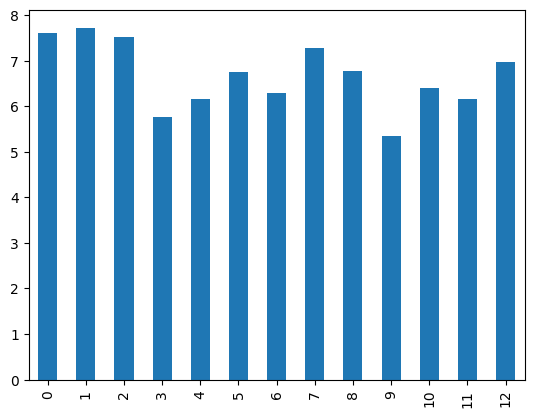

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


s = pd.Series([7.613388883764856, 7.7239836708176886, 7.50977203424554, 5.769394177757204, 6.1462348337906105, 6.746630356040051, 6.292013147147372, 7.278624294189892, 6.761026290175505, 5.334416396513751, 6.402406605964643, 6.150669517734339, 6.961633891054329])
s.plot.bar()
plt.show()

In [ ]:
print()

In [ ]:
print(max_ntopic, max_sim)

3 8.154661545529962
